<a href="https://colab.research.google.com/github/TienLungSun/PyTorch-deep-learning/blob/main/7.1.%20Conv_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from torchsummary import summary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
import torch
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda GeForce GTX 1660 SUPER


In [ ]:
class Flatten(nn.Module):
  def forward(self, input):
    return input.view(input.size(0), -1)

In [ ]:
class UnFlatten(nn.Module):
  def forward(self, input, size=1024):
    return input.view(input.size(0), size, 1, 1)

In [ ]:
class autoencoder(nn.Module):
  def __init__(self,i=1024,o=64):
    super(autoencoder, self).__init__()
    self.encoder = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=2, stride=2),
      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(32, 64, kernel_size=2, stride=2),
      nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(64, 128, kernel_size=2, stride=2),
      nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(128, 256, kernel_size=2, stride=2),
      nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(256, 512, kernel_size=2, stride=2),
      nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(512, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(1024, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      Flatten(),
      nn.Linear(in_features=i, out_features=o),
    )
    self.decoder = nn.Sequential(
      nn.Linear(in_features=o, out_features=i),
      UnFlatten(),
      nn.ConvTranspose2d(1024, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2),
      nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
      nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
      nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
      nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(32, 3, kernel_size=2, stride=2),
      nn.BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.Sigmoid(),
    )

  def forward(self, x):
      x = self.encoder(x)
      x = self.decoder(x)
      return x

In [ ]:
model=autoencoder()
model.to(device)

autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 512, kernel_size=(2, 2), stride=(2, 2))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Conv2d(512, 1024, kernel_size=(2, 2), stride=(2, 2))
    (16): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, t

In [ ]:
# 你可以用 summary 看 NN 需要的 memory space
summary(model,(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             416
       BatchNorm2d-2           [-1, 32, 64, 64]              64
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 32, 32]           8,256
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 16, 16]          32,896
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
           Conv2d-10            [-1, 256, 8, 8]         131,328
      BatchNorm2d-11            [-1, 256, 8, 8]             512
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 512, 4, 4]         524,800
      BatchNorm2d-14            [-1, 51

In [ ]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

### Load input training images

First define the transfomations of the input image

In [ ]:
transformer = transforms.Compose([
  transforms.Resize((128, 128)),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] )])

If you connect to Google drive from Colob, run following two cells

In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive", force_remount=True)

In [ ]:
#train_dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/新增資料夾/train" , transform = transformer)

If you run on your PC or you upload image files to Colob, run following cell <br>

In [ ]:
train_dataset = datasets.ImageFolder(root = "./train" , transform = transformer)

In [ ]:
train_size = int(0.8 * len(train_dataset))  # 80% for training
val_size = len(train_dataset) - train_size  # Remaining 20% for validation
print(train_size, val_size)

8 2


Notice: train_size and val_size must be even number (都要是偶數)

### 練習 send one batch to AE

In [ ]:
# Create data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

In [ ]:
for batchX, _ in train_loader:
  break
print(batchX.shape)

torch.Size([2, 3, 128, 128])


In [ ]:
batchX_hat=model(batchX.to(device))
print(batchX_hat.shape)

torch.Size([2, 3, 128, 128])


In [ ]:
loss = loss_func(batchX_hat, batchX.to(device))
print(loss)

tensor(0.6797, device='cuda:0', grad_fn=<MseLossBackward0>)


In [ ]:
def ConvertTensorToArray (tensorInput):
  imgTensor = torchvision.utils.make_grid(tensorInput)
  imgArray = imgTensor.numpy()
  imgArray1 = np.zeros((imgArray.shape[1], imgArray.shape[2], 3))
  imgArray1[:,:,0] = imgArray[0, :, :]
  imgArray1[:,:,1] = imgArray[1, :, :]
  imgArray1[:,:,2] = imgArray[2, :, :]
  imgArray1 = imgArray1*0.5+0.5
  return imgArray1

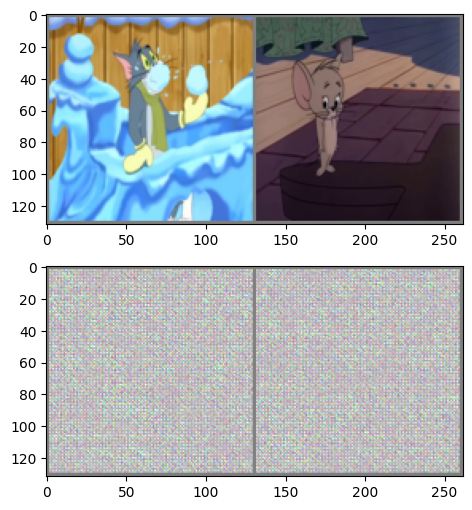

In [ ]:
#compare Input vs Output when NN is not trained yet
fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX)
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(batchX_hat.cpu())
axs[1].imshow(imgArray)
plt.show()

## Training loop

In [ ]:
epochs = 500        #change to 3000, 5000, ...
print_interval = int(epochs/10)

In [ ]:
train_lossLst = []
validation_lossLst = []

train_dataset1, val_dataset = random_split(train_dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset1, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

for epoch in range(epochs):
    if(epoch%print_interval==0):
      print("\nepoch = ", epoch, end = ", ")
      print("batch: ", end="")

    epoch_lossLst=[]
    for step, (batchX, _) in enumerate(train_loader):
        if(epoch% print_interval==0 and step%5==0):
          print(step, end = ",")
        batchX = batchX.to(device)
        batchX_hat = model(batchX)
        loss = loss_func(batchX_hat, batchX)
        epoch_lossLst.append(float(loss))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg = sum(epoch_lossLst)/len(epoch_lossLst)
    train_lossLst.append(avg)

    epoch_lossLst=[]
    for step, (batchX, _) in enumerate(val_loader):
        batchX = batchX.to(device)
        batchX_hat = model(batchX)
        loss = loss_func(batchX_hat, batchX)
        epoch_lossLst.append(float(loss))
    avg = sum(epoch_lossLst) / len(epoch_lossLst)
    validation_lossLst.append(avg)


epoch =  0, batch: 0,
epoch =  50, batch: 0,
epoch =  100, batch: 0,
epoch =  150, batch: 0,
epoch =  200, batch: 0,
epoch =  250, batch: 0,
epoch =  300, batch: 0,
epoch =  350, batch: 0,
epoch =  400, batch: 0,
epoch =  450, batch: 0,

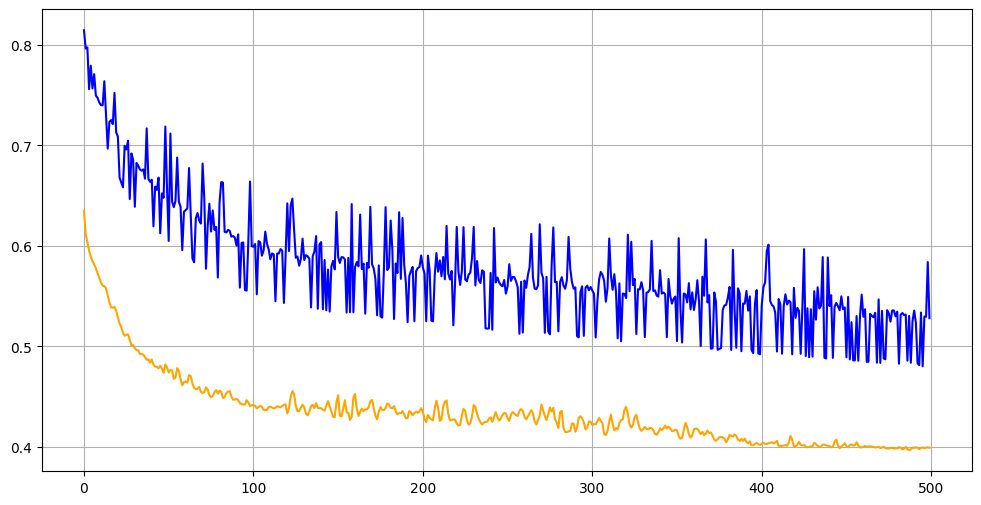

In [ ]:
fig=plt.figure(figsize=(12, 6))
plt.plot(train_lossLst, color='blue')
plt.plot(validation_lossLst, color='orange')
plt.grid()
plt.show()

Compare Input vs Output with training images

In [ ]:
model.eval()
print("")

In [ ]:
for batchX, _ in train_loader:
  break
print(batchX.shape)

torch.Size([2, 3, 128, 128])


In [ ]:
batchX_hat=model(batchX.to(device))
print(batchX_hat.shape)

torch.Size([2, 3, 128, 128])


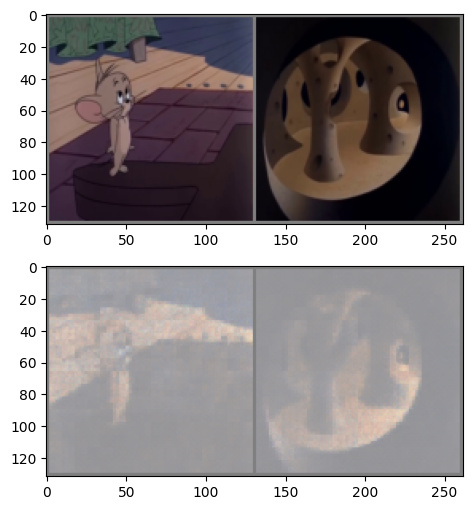

In [ ]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX)
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(batchX_hat.cpu())
axs[1].imshow(imgArray)
plt.show()

### Test with un-seen test data

In [ ]:
test_dataset = datasets.ImageFolder(root = "./test", transform = transformer)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)
for batchX, _ in test_loader:
  break
batchX_hat=model(batchX.to(device))

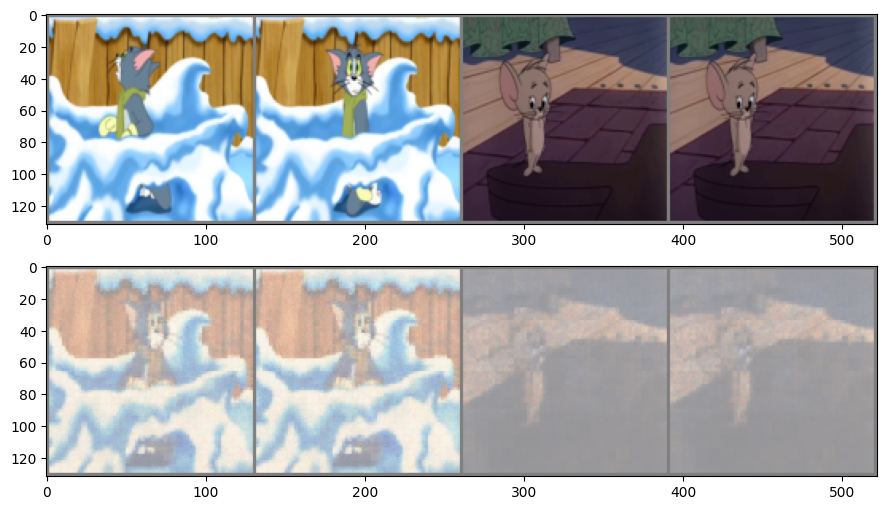

In [ ]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX)
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(batchX_hat.cpu())
axs[1].imshow(imgArray)
plt.show()

### 練習 pass a batch of training images to AE to get their latent vectors

In [ ]:
for batchX, batchY in train_loader:
  break
print(batchX.shape)

torch.Size([2, 3, 128, 128])


In [ ]:
# batchY in tensor, array, and reshape
arrayY = batchY.cpu().detach().numpy()
arrayY1 = arrayY.reshape(arrayY.shape[0], 1)
print(batchY, "\n", arrayY, "\n", arrayY.shape, "\n", arrayY1, "\n", arrayY1.shape)

tensor([1, 1]) 
 [1 1] 
 (2,) 
 [[1]
 [1]] 
 (2, 1)


In [ ]:
batchX_hat=model.encoder(batchX.to(device))
print(batchX_hat.shape)

torch.Size([2, 64])


In [ ]:
batchX_hat.cpu().detach().numpy().shape

(2, 64)

In [ ]:
array1 = np.array(batchX_hat.cpu().detach().numpy())
print(array1.shape)

(2, 64)


In [ ]:
array2 = np.array(batchX_hat.cpu().detach().numpy())

In [ ]:
arrayY3 = np.concatenate((array1, array2))
print(arrayY3.shape)

(4, 64)


### 練習 Get the latent vectors of all training images

In [ ]:
for step, (batchX, batchY) in enumerate(train_loader):
  batchX_hat = model.encoder(batchX.to(device))
  if(step==0):
    arrayX = np.array(batchX_hat.cpu().detach().numpy())
    arrayY = batchY.cpu().detach().numpy()
  else:
    arrayX = np.concatenate((arrayX, batchX_hat.cpu().detach().numpy()))
    arrayY = np.concatenate((arrayY, batchY.cpu().detach().numpy()))
print(arrayX.shape, arrayY.shape)

(8, 64) (8,)


### 練習 Build a customized data loader so we can load file name information

In [ ]:
class ImageFolderWithPaths(datasets.ImageFolder):
  """Custom dataset that includes image file names. Extends
  torchvision.datasets.ImageFolder
  """
  # override the __getitem__ method. this is the method that dataloader calls
  def __getitem__(self, index):
    # this is what ImageFolder normally returns
    original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
    # the image file path
    path = self.imgs[index][0]
    # make a new tuple that includes original and the path
    tuple_with_path = (original_tuple + (path,))
    return tuple_with_path

In [ ]:
train_dataset1 = ImageFolderWithPaths(root = "./train", transform = transformer) # our custom dataset

In [ ]:
dataloader = DataLoader(
    dataset=train_dataset1,
    batch_size=16,
    shuffle=False)

In [ ]:
for batchX, batchY, paths in dataloader:
  break

In [ ]:
for fname in paths:
  print(fname)

./train\class 1\frame26.jpg
./train\class 1\frame28.jpg
./train\class 1\frame35.jpg
./train\class 1\frame38.jpg
./train\class 1\frame39.jpg
./train\class 2\frame161.jpg
./train\class 2\frame162.jpg
./train\class 2\frame163.jpg
./train\class 2\frame216.jpg
./train\class 2\frame217.jpg


In [ ]:
s = paths[0]
index = s.find("frame")
print(s, index)
print(s[index:])

./train\class 1\frame26.jpg 16
frame26.jpg


In [ ]:
for fname in paths:
  index = fname.find("frame")
  fname = fname[index:]
  print(fname)

frame26.jpg
frame28.jpg
frame35.jpg
frame38.jpg
frame39.jpg
frame161.jpg
frame162.jpg
frame163.jpg
frame216.jpg
frame217.jpg


### Use the customized data loader to get the latent vectors of all training data

In [ ]:
fnameLst = []
for step, (batchX, batchY, paths) in enumerate(dataloader):
  batchX_hat = model.encoder(batchX.to(device))
  if(step==0):
    arrayX = np.array(batchX_hat.cpu().detach().numpy())
    arrayY = batchY.cpu().detach().numpy()
  else:
    arrayX = np.concatenate((arrayX, batchX_hat.cpu().detach().numpy()))
    arrayY = np.concatenate((arrayY, batchY.cpu().detach().numpy()))
  for fname in paths:
    index = fname.find("frame")
    fname = fname[index:]
    fnameLst.append(fname)
print(arrayX.shape, arrayY.shape, len(fnameLst))

(10, 64) (10,) 10


### Use t-SNE to reduce dimensions from 64 to 2 so we can visualize

In [ ]:
tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=500)
# try perlexity = 5, 10, 30, 50

In [ ]:
x=tsne.fit_transform(arrayX)
print(x.shape)

(10, 2)


In [ ]:
colors = ['red', 'blue']  # 2 classes
color_map = []
for idx in arrayY:
    color_map.append(colors[idx])

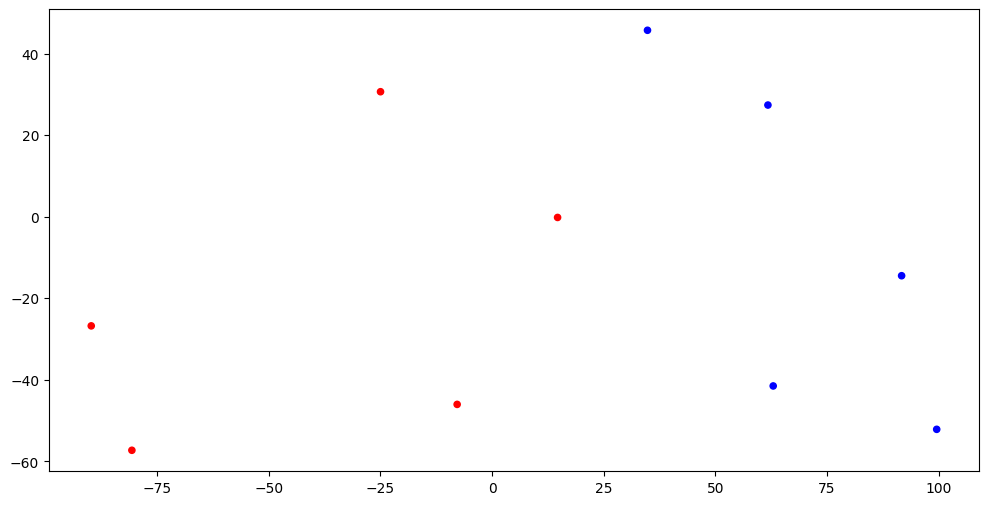

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x[:, 0], x[:, 1], c=color_map, s=20) #we have 5 classes
plt.show()

### 練習 Save data to csv for Tableau visual exploration

merge t-SNE output (x1, x2) with label y

In [ ]:
print(x.shape, arrayY.shape, len(fnameLst))

(10, 2) (10,) 10


In [ ]:
arrayY1 = arrayY.reshape(arrayY.shape[0], 1)
print(arrayY1.shape)

(10, 1)


In [ ]:
XYArray = np.hstack((x, arrayY1))
print(XYArray.shape)

(10, 3)


In [ ]:
df = pd.DataFrame(XYArray)
print(df.head(5), "\n", df.shape)

           0          1    2
0 -80.670227 -57.294830  0.0
1 -89.770790 -26.786179  0.0
2  -7.832413 -46.039951  0.0
3  14.656417  -0.195169  0.0
4 -24.991581  30.639719  0.0 
 (10, 3)


In [ ]:
# convert fname list to pandas
df1 = pd.DataFrame(fnameLst)
print(df1.head(5), "\n", df1.shape)

             0
0  frame26.jpg
1  frame28.jpg
2  frame35.jpg
3  frame38.jpg
4  frame39.jpg 
 (10, 1)


In [ ]:
# concat when axis = 1
df = pd.concat([df1, df], axis=1, ignore_index=True)
print(df.head(5), "\n", df.shape)

             0          1          2    3
0  frame26.jpg -80.670227 -57.294830  0.0
1  frame28.jpg -89.770790 -26.786179  0.0
2  frame35.jpg  -7.832413 -46.039951  0.0
3  frame38.jpg  14.656417  -0.195169  0.0
4  frame39.jpg -24.991581  30.639719  0.0 
 (10, 4)


In [ ]:
 # Save data to excel for further Tableau visualization
df.to_csv("tSNEResults.csv", index=False)

### 練習 Save and load PyTorch model (maybe you need in the future)

In [ ]:
torch.save(model.state_dict(), "ConvAE.pth")

In [ ]:
model=autoencoder() #build NN architecture
model.load_state_dict(torch.load("ConvAE.pth")) #load model weights
model.to(device)
model.eval()
print("")